In [1]:
# enemy detection
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [2]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [3]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!make

/content/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
.

In [4]:
# download trained weights
!gdown --id 10tRT1f1pCgYmYZE3wFro5hWT5cJkK5aq

Downloading...
From: https://drive.google.com/uc?id=10tRT1f1pCgYmYZE3wFro5hWT5cJkK5aq
To: /content/darknet/codm_model_data.zip
272MB [00:01, 262MB/s]


In [5]:
!unzip codm_model_data.zip
!rm codm_model_data.zip

Archive:  codm_model_data.zip
replace codm_model_data/codm.data? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: codm_model_data/codm.data  
  inflating: codm_model_data/train_codm_yolov4.cfg  
  inflating: codm_model_data/model.weights  
 extracting: codm_model_data/codm.names  
  inflating: codm_model_data/test.mp4  
  inflating: codm_model_data/test.jpeg  


In [6]:
!cp codm_model_data/codm.data codm_model_data/codm.names data/
!cp codm_model_data/model.weights backup/
!cp codm_model_data/train_codm_yolov4.cfg cfg/

In [7]:
def download(path):
  from google.colab import files
  files.download(path)

In [8]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  

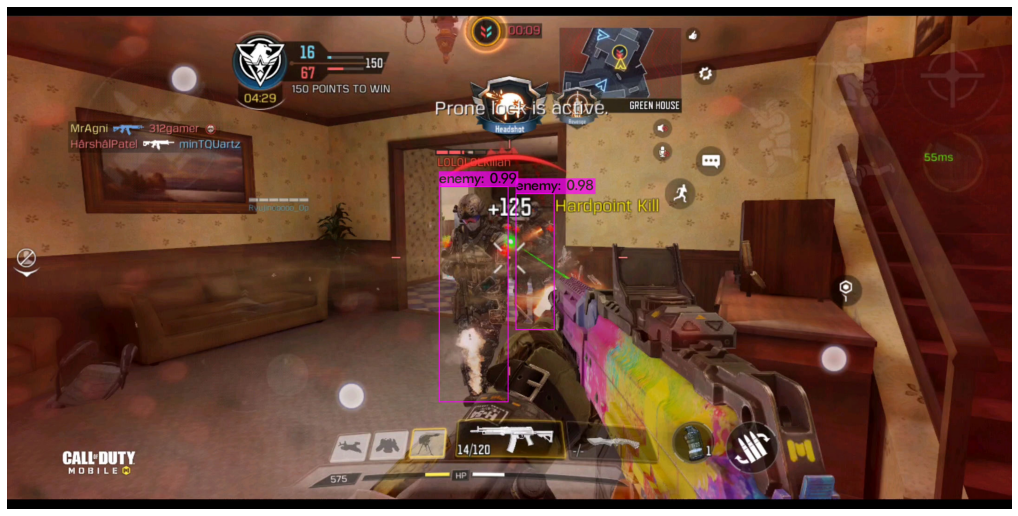

In [10]:
!chmod +x darknet
!./darknet detector test data/codm.data cfg/train_codm_yolov4.cfg backup/model.weights codm_model_data/test.jpeg -dont_show

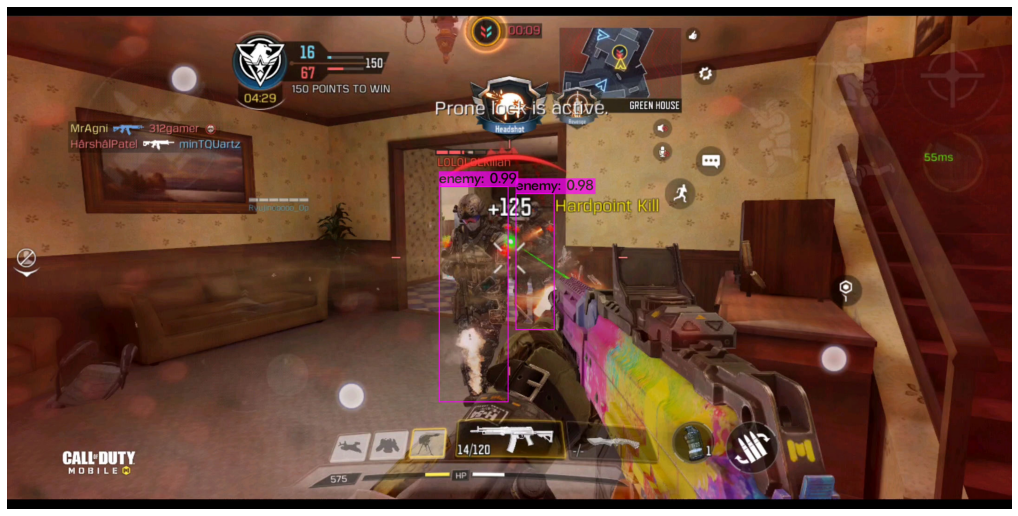

In [17]:
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(plt.imread("predictions.jpg"))

In [11]:
!chmod +x darknet
!./darknet detector demo data/codm.data cfg/train_codm_yolov4.cfg backup/model.weights codm_model_data/test.mp4 -dont_show -out_filename out.mp4

Streaming output truncated to the last 5000 lines.

 cvWriteFrame 
Objects:


FPS:19.7 	 AVG_FPS:17.2

 cvWriteFrame 
Objects:


FPS:20.0 	 AVG_FPS:17.2

 cvWriteFrame 
Objects:


FPS:20.1 	 AVG_FPS:17.2

 cvWriteFrame 
Objects:


FPS:20.5 	 AVG_FPS:17.2

 cvWriteFrame 
Objects:


FPS:19.9 	 AVG_FPS:17.2

 cvWriteFrame 
Objects:


FPS:19.3 	 AVG_FPS:17.2

 cvWriteFrame 
Objects:


FPS:20.0 	 AVG_FPS:17.2

 cvWriteFrame 
Objects:


FPS:19.5 	 AVG_FPS:17.2

 cvWriteFrame 
Objects:


FPS:19.5 	 AVG_FPS:17.2

 cvWriteFrame 
Objects:


FPS:19.2 	 AVG_FPS:17.2

 cvWriteFrame 
Objects:


FPS:19.3 	 AVG_FPS:17.2

 cvWriteFrame 
Objects:


FPS:19.3 	 AVG_FPS:17.2

 cvWriteFrame 
Objects:


FPS:19.5 	 AVG_FPS:17.2

 cvWriteFrame 
Objects:


FPS:19.6 	 AVG_FPS:17.2

 cvWriteFrame 
Objects:


FPS:19.7 	 AVG_FPS:17.2

 cvWriteFrame 
Objects:


FPS:19.8 	 AVG_FPS:17.2

 cvWriteFrame 
Objects:


FPS:19.7 	 AVG_FPS:17.2

 cvWriteFrame 
Objects:

enemy: 38% 

FPS:19.6 	 AVG_FPS:17.2

 cvWriteFrame 
Obj

In [ ]:
# download file and play
download("out.mp4")